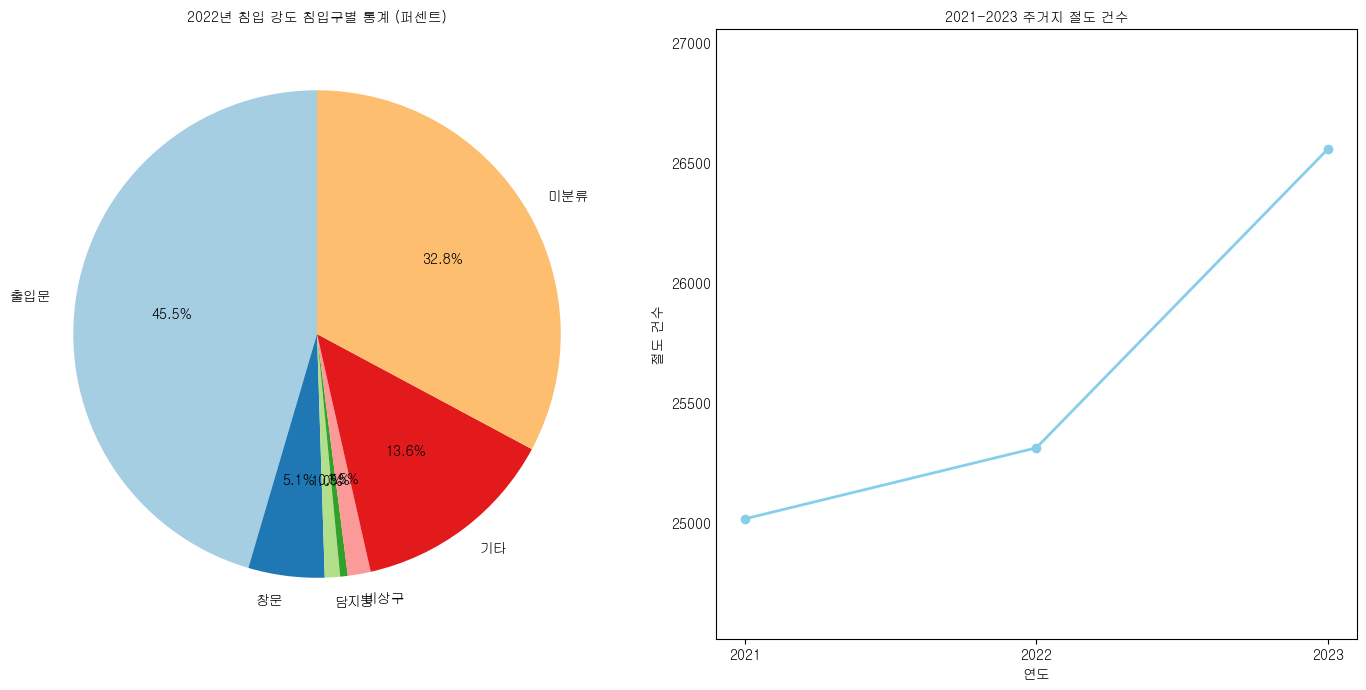

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager

# matplotlib에는 한글 인코딩 값이 없음 -> 한글 깨짐 현상
font_fname = 'C:/Windows/Fonts/gulim.ttc'      # 굴림체로 변경
font_family = font_manager.FontProperties(fname=font_fname).get_name()      # 폰트 패밀리 값 알아오기
plt.rcParams["font.family"] = font_family       # plt에 폰트 설정

# 데이터 준비 (침입 강도 통계)
data = {
    '침입 방법': ['출입문', '창문', '담', '지붕', '비상구', '기타', '미분류'],
    '건수': [90, 10, 2, 1, 3, 27, 65]
}

# DataFrame으로 변환
df = pd.DataFrame(data)

# 퍼센트 계산
df['퍼센트'] = (df['건수'] / df['건수'].sum()) * 100

# 2021-2023 주거 절도 통계
residence_robbery_data = {
    '연도': [2021, 2022, 2023],
    '주거지 절도 건수': [25017, 25313, 26558]
}

# DataFrame으로 변환
df_residence_robbery = pd.DataFrame(residence_robbery_data)

# 그래프 생성
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# 첫 번째 그래프: 퍼센트 그래프 (침입 방법별)
ax[0].pie(df['퍼센트'], labels=df['침입 방법'], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax[0].set_title('2022년 침입 강도 침입구별 통계 (퍼센트)', fontproperties=font_family)

# 두 번째 그래프: 2021-2023 주거 절도 선 그래프
ax[1].plot(df_residence_robbery['연도'], df_residence_robbery['주거지 절도 건수'], marker='o', color='skyblue', linestyle='-', linewidth=2)

# y축 범위 설정 
ax[1].set_ylim(min(df_residence_robbery['주거지 절도 건수']) - 500, max(df_residence_robbery['주거지 절도 건수']) + 500)

# x축에 표시할 값 설정 (연도 값만 표시)
ax[1].set_xticks([2021, 2022, 2023])

# 제목, 레이블 설정
ax[1].set_title('2021-2023 주거지 절도 건수', fontproperties=font_family)
ax[1].set_xlabel('연도', fontproperties=font_family)
ax[1].set_ylabel('절도 건수', fontproperties=font_family)

# 불필요한 y축 눈금 제거
ax[1].tick_params(axis='y', which='both', length=0)

plt.tight_layout()
plt.show()
